In [1]:
from astropy.io import fits

# Define the list of FITS file paths
fits_files = []

for i in range(40, 100, 1):
    fits_files.append(f'WASP-12b/WASP-12b_000{i}_bsdf.fits')

for i in range(100, 270, 1):
    fits_files.append(f'WASP-12b/WASP-12b_00{i}_bsdf.fits')
    
print(fits_files)

['WASP-12b/WASP-12b_00040_bsdf.fits', 'WASP-12b/WASP-12b_00041_bsdf.fits', 'WASP-12b/WASP-12b_00042_bsdf.fits', 'WASP-12b/WASP-12b_00043_bsdf.fits', 'WASP-12b/WASP-12b_00044_bsdf.fits', 'WASP-12b/WASP-12b_00045_bsdf.fits', 'WASP-12b/WASP-12b_00046_bsdf.fits', 'WASP-12b/WASP-12b_00047_bsdf.fits', 'WASP-12b/WASP-12b_00048_bsdf.fits', 'WASP-12b/WASP-12b_00049_bsdf.fits', 'WASP-12b/WASP-12b_00050_bsdf.fits', 'WASP-12b/WASP-12b_00051_bsdf.fits', 'WASP-12b/WASP-12b_00052_bsdf.fits', 'WASP-12b/WASP-12b_00053_bsdf.fits', 'WASP-12b/WASP-12b_00054_bsdf.fits', 'WASP-12b/WASP-12b_00055_bsdf.fits', 'WASP-12b/WASP-12b_00056_bsdf.fits', 'WASP-12b/WASP-12b_00057_bsdf.fits', 'WASP-12b/WASP-12b_00058_bsdf.fits', 'WASP-12b/WASP-12b_00059_bsdf.fits', 'WASP-12b/WASP-12b_00060_bsdf.fits', 'WASP-12b/WASP-12b_00061_bsdf.fits', 'WASP-12b/WASP-12b_00062_bsdf.fits', 'WASP-12b/WASP-12b_00063_bsdf.fits', 'WASP-12b/WASP-12b_00064_bsdf.fits', 'WASP-12b/WASP-12b_00065_bsdf.fits', 'WASP-12b/WASP-12b_00066_bsdf.fits', 

In [2]:
# collect data from fits files
fits_data = []
    
for fits_file in fits_files:
    file_data = fits.open(fits_file)
    image_data = file_data[0].data
   
    fits_data.append(image_data)

print(fits_data[0:5])

[array([[1240, 1253, 1250, ..., 1204, 1260, 1205],
       [1274, 1221, 1207, ..., 1177, 1171, 1203],
       [1244, 1217, 1227, ..., 1217, 1254, 1193],
       ...,
       [1233, 1245, 1188, ..., 1228, 1254, 1221],
       [1254, 1197, 1260, ..., 1183, 1264, 1238],
       [1273, 1231, 1236, ..., 1229, 1237, 1213]], dtype=uint16), array([[1289, 1211, 1242, ..., 1213, 1209, 1172],
       [1235, 1264, 1251, ..., 1201, 1221, 1198],
       [1233, 1217, 1203, ..., 1193, 1187, 1208],
       ...,
       [1249, 1215, 1240, ..., 1228, 1191, 1235],
       [1293, 1262, 1247, ..., 1169, 1178, 1203],
       [1270, 1216, 1204, ..., 1207, 1151, 1213]], dtype=uint16), array([[1323, 1211, 1250, ..., 1209, 1195, 1185],
       [1262, 1231, 1219, ..., 1178, 1130, 1148],
       [1296, 1278, 1228, ..., 1136, 1201, 1216],
       ...,
       [1279, 1194, 1236, ..., 1195, 1188, 1221],
       [1245, 1192, 1173, ..., 1196, 1208, 1185],
       [1261, 1272, 1218, ..., 1216, 1167, 1219]], dtype=uint16), array([[1318, 1

In [3]:
# define position of star and aperture and annulus
from photutils.aperture import CircularAperture, CircularAnnulus

position = [1215.03, 3988.81]
aperture = CircularAperture(position,r=5.0)
annulus_aperture = CircularAnnulus(position, r_in=10, r_out=15)

In [7]:
# perform aperture photometry on selected star for each fits file
from photutils.aperture import aperture_photometry, ApertureStats

star_data = []

for file in fits_data:
    # define background
    aperstats = ApertureStats(file, annulus_aperture)
    bkg_mean = aperstats.mean
    aperture_area = aperture.area_overlap(file)
    total_bkg = bkg_mean*aperture_area
    
    # append aperture sum minus total background
    star_data.append(aperture_photometry(file,aperture)['aperture_sum']-total_bkg)
    
print(star_data[0:5])


[<Column name='aperture_sum' dtype='float64' length=1>
107874.35862929336, <Column name='aperture_sum' dtype='float64' length=1>
134113.19192336436, <Column name='aperture_sum' dtype='float64' length=1>
93779.49671662787, <Column name='aperture_sum' dtype='float64' length=1>
99814.5759374067, <Column name='aperture_sum' dtype='float64' length=1>
120360.10482424416]


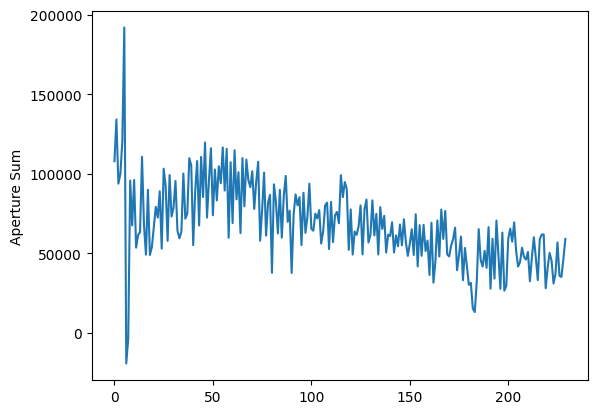

In [8]:
#plot aperture sums
import matplotlib.pyplot as plt
plt.plot(star_data)
plt.ylabel('Aperture Sum')
plt.show()